In [1]:
import numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
from collections import Counter
from typing import List



def chain_builder_classical(N, rho, r1):
    """
    having chain be a numpy array that the first column is the ferminonic number of the pair and the second column 
    is the Majorana operator which can be assigned randomly at contact to simulate quantum randomness.
    third column is the pair index
    """
    if N % 2 != 0:
        raise ValueError("N must be even for a Majorana chain.")
    
    chain = np.full((N* rho, 3), -10) 
       
    for i in range(N):
            
        rho_middle = int(rho * r1)
        # print(rho_middle)
            
        chain[(i * rho + rho_middle) % (N * rho)][0] = 1 # initially all pairs have fermion number 1
        chain[(i * rho + rho_middle) % (N * rho)][1] = 47
        chain[(i * rho + rho_middle) % (N * rho)][2] = int(i/2)
        chain[((i+1) * rho) % (N * rho)][0] = 1 # initially all pairs have fermion number 1
        chain[((i+1) * rho) % (N * rho)][1] = 47
        chain[((i+1) * rho) % (N * rho)][2] = int(i/2)

    return chain

def hopping_classical(chain):
    N = len(chain)
     # get the index of Majorana operators
   
    # i =random.randint(0, N-1)
    index = np.where(chain[:,1]==47)[0]
    Nt = len(index)
    for _ in range(Nt):
        index = np.where(chain[:,1]==47)[0]
        i = random.choice(index)
        hope_direction = random.choice([-1, 1])
        if  chain[:, 2].tolist().count(-10) == N: #if all sites are empty

            return chain, 0
        if chain[i][0] == -10: #if the site is empty
            pass

        elif chain[(i+hope_direction) % N][0] == -10: #if the site to arrive is empty
            chain[(i+hope_direction) % N][0] = chain[i][0]
            chain[i][0] = -10
            chain[(i+hope_direction) % N][1] = chain[i][1]
            chain[i][1] = -10
            chain[(i+hope_direction) % N][2] = chain[i][2]
            chain[i][2] = -10
            pass

        else:
            chain[i][0] = -10
            chain[(i+hope_direction) % N][0] = -10
            chain[i][1] = -10
            chain[(i+hope_direction) % N][1] = -10
            chain[i][2] = -10
            chain[(i+hope_direction) % N][2] = -10
        # elif chain[i][2] !=  chain[(i+hope_direction) % N][2]:
        #   #if paired under periodic boundary condition:
        #     rows_i = np.where(chain[:, 2] == chain[i][2])[0]
        #     rows = np.where(chain[:, 2] == chain[(i+hope_direction) % N][2])[0]
        #     outside_index_i = [x for x in rows_i if x != i][0]
        #     outside_index = [x for x in rows if x != (i+hope_direction)%N][0]
            
        #     chain[i][0] = -10
        #     chain[(i+hope_direction) % N][0] = -10
        #     chain[i][1] = -10
        #     chain[(i+hope_direction) % N][1] = -10
        #     chain[i][2] = -10
        #     chain[(i+hope_direction) % N][2] = -10
        #     chain[outside_index_i][0] = -10
        #     chain[outside_index][0] = -10
        #     chain[outside_index_i][1] = -10
        #     chain[outside_index][1] = -10
        #     chain[outside_index_i][2] = -10
        #     chain[outside_index][2] = -10

                
    density = N - chain[:,2].tolist().count(-10)  # Count the number of empty sites
    return chain, density
    
    

def evolution_classical(chain, t):
    """
    Simulates the evolution of the Majorana chain over time t.
    The function modifies the chain in place.
    """
    density = []
    times = [i for i in range(t)]
    for _ in range(t):
        
        chain, x = hopping_classical(chain)
        density.append(x)
    return chain, times, density





In [8]:
print(chain_builder_classical(4, 5, 0.6))

[[  1  47   1]
 [-10 -10 -10]
 [-10 -10 -10]
 [  1  47   0]
 [-10 -10 -10]
 [  1  47   0]
 [-10 -10 -10]
 [-10 -10 -10]
 [  1  47   0]
 [-10 -10 -10]
 [  1  47   0]
 [-10 -10 -10]
 [-10 -10 -10]
 [  1  47   1]
 [-10 -10 -10]
 [  1  47   1]
 [-10 -10 -10]
 [-10 -10 -10]
 [  1  47   1]
 [-10 -10 -10]]


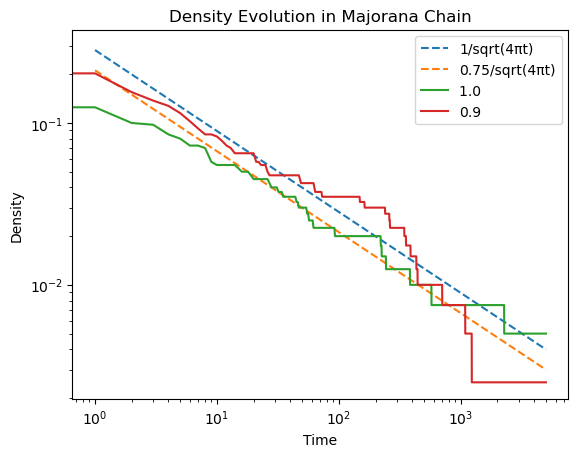

In [9]:
N = 200
rho = 4

chain1 = chain_builder_classical(N, rho, 0.25)
chain2 = chain_builder_classical(N, rho, 0.5)
# print(np.where(chain[:, 1] == 47)[0])
# print(500 - chain[:,2].tolist().count(-10))
_, times1, density1 = evolution_classical(chain1, t =5000)
_, times2, density2 = evolution_classical(chain2, t =5000)
plt.plot(times1[1:], 1/(np.sqrt(4 * np.pi * np.array(times1[1:]))), linestyle='--', label = '1/sqrt(4πt)')
plt.plot(times2[1:], 0.75/(np.sqrt(4 * np.pi * np.array(times2[1:]))), linestyle='--', label = '0.75/sqrt(4πt)')
plt.plot(times1, np.array(density1)/(N*rho), label='1.0 ')
plt.plot(times2, np.array(density2)/(N*rho), label='0.9')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.title('Density Evolution in Majorana Chain')
plt.legend()
plt.show()

In [12]:
print(chain_builder_classical(N, rho, 1.0))
print(chain_builder_classical(N, rho, 0.5))

[[  1  47   4]
 [-10 -10 -10]
 [  1  47   0]
 [-10 -10 -10]
 [  1  47   0]
 [-10 -10 -10]
 [  1  47   1]
 [-10 -10 -10]
 [  1  47   1]
 [-10 -10 -10]
 [  1  47   2]
 [-10 -10 -10]
 [  1  47   2]
 [-10 -10 -10]
 [  1  47   3]
 [-10 -10 -10]
 [  1  47   3]
 [-10 -10 -10]
 [  1  47   4]
 [-10 -10 -10]]
[[ 1 47  4]
 [ 1 47  0]
 [ 1 47  0]
 [ 1 47  0]
 [ 1 47  0]
 [ 1 47  1]
 [ 1 47  1]
 [ 1 47  1]
 [ 1 47  1]
 [ 1 47  2]
 [ 1 47  2]
 [ 1 47  2]
 [ 1 47  2]
 [ 1 47  3]
 [ 1 47  3]
 [ 1 47  3]
 [ 1 47  3]
 [ 1 47  4]
 [ 1 47  4]
 [ 1 47  4]]


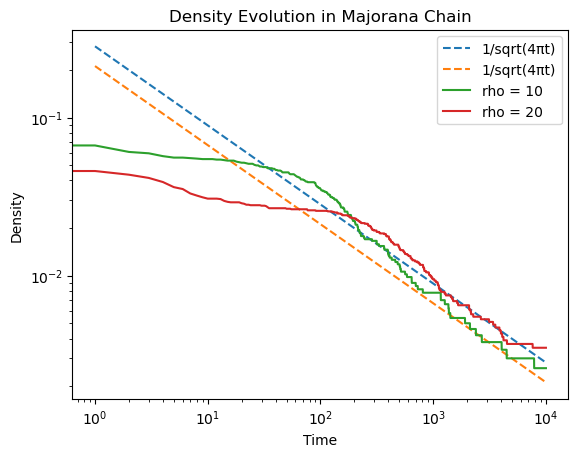

In [27]:
plt.plot(times1[1:], 1/(np.sqrt(4 * np.pi * np.array(times1[1:]))), linestyle='--', label = '1/sqrt(4πt)')
plt.plot(times2[1:], 0.75/(np.sqrt(4 * np.pi * np.array(times2[1:]))), linestyle='--', label = '1/sqrt(4πt)')
plt.plot(times1, np.array(density1)/5000, label='rho = 10')
plt.plot(times2, np.array(density2)/10000, label='rho = 20')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.title('Density Evolution in Majorana Chain')
plt.legend()
plt.show()